<a href="https://colab.research.google.com/github/cindyzakya/Data-Science-Final-Project-US-Data-Engineer-Salary-Segmentation/blob/main/Data%20Science-Final%20Project-US%20Data%20Engineer%20Salary%20Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Clustering Dataset "Data Science Salaries 2024"

### Data Sains - F
### Kelompok 2
*   Cindy Zakya Andini (225150700111019)
*   Rahimi Illong Tabayuni (225150707111046)
*   Gabriela Edith Petra Febriandhini	(225150707111049)  

In [ ]:
!pip install optuna

In [ ]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
import optuna

In [ ]:
# Import modul files dari Google Colab untuk menangani file
from google.colab import files

# Upload file dari komputer ke Google Colab.
files.upload()

Saving data_science_salaries.csv to data_science_salaries (1).csv


{'data_science_salaries (1).csv': b'job_title,experience_level,employment_type,work_models,work_year,employee_residence,salary,salary_currency,salary_in_usd,company_location,company_size\r\nData Engineer,Mid-level,Full-time,Remote,2024,United States,148100,USD,148100,United States,Medium\r\nData Engineer,Mid-level,Full-time,Remote,2024,United States,98700,USD,98700,United States,Medium\r\nData Scientist,Senior-level,Full-time,Remote,2024,United States,140032,USD,140032,United States,Medium\r\nData Scientist,Senior-level,Full-time,Remote,2024,United States,100022,USD,100022,United States,Medium\r\nBI Developer,Mid-level,Full-time,On-site,2024,United States,120000,USD,120000,United States,Medium\r\nBI Developer,Mid-level,Full-time,On-site,2024,United States,62100,USD,62100,United States,Medium\r\nResearch Analyst,Entry-level,Full-time,On-site,2024,United States,250000,USD,250000,United States,Medium\r\nResearch Analyst,Entry-level,Full-time,On-site,2024,United States,150000,USD,150000,Un

In [ ]:
# Membaca dataset dan memasukkan ke dalam variabel salaries_data
salaries_data = pd.read_csv('data_science_salaries.csv')

# Informasi dataset
print("Dataset Info:")
print(salaries_data.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6599 entries, 0 to 6598
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   job_title           6599 non-null   object
 1   experience_level    6599 non-null   object
 2   employment_type     6599 non-null   object
 3   work_models         6599 non-null   object
 4   work_year           6599 non-null   int64 
 5   employee_residence  6599 non-null   object
 6   salary              6599 non-null   int64 
 7   salary_currency     6599 non-null   object
 8   salary_in_usd       6599 non-null   int64 
 9   company_location    6599 non-null   object
 10  company_size        6599 non-null   object
dtypes: int64(3), object(8)
memory usage: 567.2+ KB
None


In [ ]:
# Memfilter dataset untuk menggunakan dataset dengan 'company_location' di United States dan 'job_title' sebagai Data Engineer
data_engineer_salaries = salaries_data[(salaries_data['company_location'] == 'United States') & (salaries_data['job_title'] == 'Data Engineer')]

# Menghapus kolom 'job_title' dan 'company_location'
data_engineer_salaries = data_engineer_salaries.drop(columns=['job_title', 'company_location', 'employee_residence', 'salary', 'salary_currency'])

# Informasi dataset setelah difilter
print("Dataset Info:")
print(data_engineer_salaries.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 1066 entries, 0 to 6553
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   experience_level  1066 non-null   object
 1   employment_type   1066 non-null   object
 2   work_models       1066 non-null   object
 3   work_year         1066 non-null   int64 
 4   salary_in_usd     1066 non-null   int64 
 5   company_size      1066 non-null   object
dtypes: int64(2), object(4)
memory usage: 58.3+ KB
None


In [ ]:
# Tampilan 5 baris pertama dataset setelah difilter
data_engineer_salaries.head()

,experience_level,employment_type,work_models,work_year,salary_in_usd,company_size
0,Mid-level,Full-time,Remote,2024,148100,Medium
1,Mid-level,Full-time,Remote,2024,98700,Medium
8,Executive-level,Full-time,Remote,2024,219650,Medium
9,Executive-level,Full-time,Remote,2024,136000,Medium
14,Mid-level,Full-time,On-site,2024,145500,Medium


In [ ]:
# Pemeriksaan apakah dataset memiliki outlier
# Analisis outlier gaji (univariat) --> fokus mendeteksi outlier di kolom salary_in_usd
# Q1, Q3, dan IQR
Q1 = data_engineer_salaries['salary_in_usd'].quantile(0.25)
Q3 = data_engineer_salaries['salary_in_usd'].quantile(0.75)
IQR = Q3 - Q1

# Batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Menghapus baris yang mengandung outlier
data_engineer_salaries_cleaned = data_engineer_salaries[
    (data_engineer_salaries['salary_in_usd'] >= lower_bound) &
    (data_engineer_salaries['salary_in_usd'] <= upper_bound)
]

# Menyimpan dataset yang telah difilter dan dibersihkan dari outlier ke dalam file CSV baru
data_engineer_salaries_cleaned.to_csv('data_engineer_salaries.csv', index=False)

de_salaries = pd.read_csv('data_engineer_salaries.csv')

# Informasi dataset setelah proses data cleaning
print("Dataset Info:")
print(de_salaries.info())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1054 entries, 0 to 1053
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   experience_level  1054 non-null   object
 1   employment_type   1054 non-null   object
 2   work_models       1054 non-null   object
 3   work_year         1054 non-null   int64 
 4   salary_in_usd     1054 non-null   int64 
 5   company_size      1054 non-null   object
dtypes: int64(2), object(4)
memory usage: 49.5+ KB
None


In [ ]:
# Tampilan 5 baris pertama dataset yang sudah dibersihkan dari outlier dan disimpan dalam file CSV baru
de_salaries.head()

,experience_level,employment_type,work_models,work_year,salary_in_usd,company_size
0,Mid-level,Full-time,Remote,2024,148100,Medium
1,Mid-level,Full-time,Remote,2024,98700,Medium
2,Executive-level,Full-time,Remote,2024,219650,Medium
3,Executive-level,Full-time,Remote,2024,136000,Medium
4,Mid-level,Full-time,On-site,2024,145500,Medium


Deskriptif Statistik Dataset:
         work_year  salary_in_usd
count  1054.000000    1054.000000
mean   2022.833017  153831.421252
std       0.616804   55610.368813
min    2020.000000   20000.000000
25%    2023.000000  111606.250000
50%    2023.000000  147100.000000
75%    2023.000000  188675.000000
max    2024.000000  310000.000000


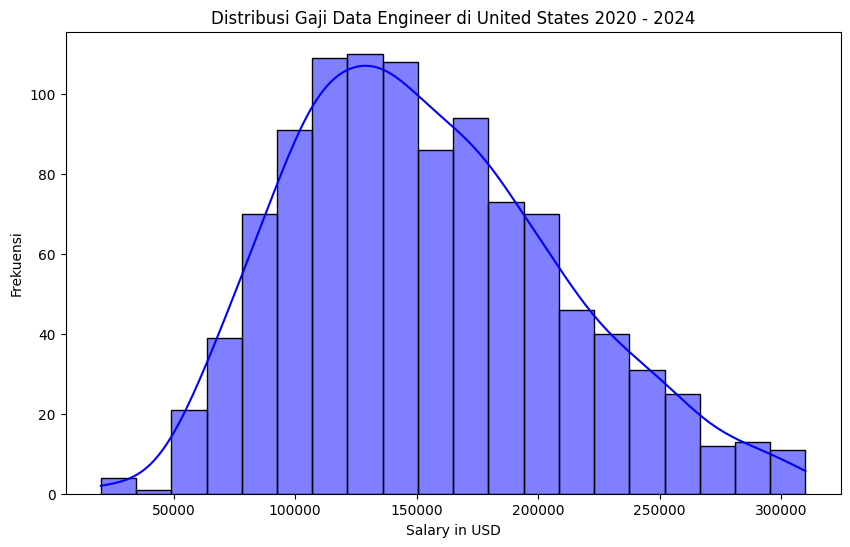

In [ ]:
# Tahap Data Exploration
# 1. Deskriptif Statistik untuk melihat gambaran umum dataset
print("Deskriptif Statistik Dataset:")
print(de_salaries.describe())

# 2. Visualisasi distribusi kolom 'salary_in_usd'
plt.figure(figsize=(10, 6))
sns.histplot(de_salaries['salary_in_usd'], kde=True, color='blue')
plt.title('Distribusi Gaji Data Engineer di United States 2020 - 2024')
plt.xlabel('Salary in USD')
plt.ylabel('Frekuensi')
plt.show()


In [ ]:
# Memilih fitur yang relevan untuk clustering
features = de_salaries[['experience_level', 'employment_type', 'salary_in_usd', 'company_size']]

# Memisahkan fitur numerik dan kategorikal
numerical_features = ['salary_in_usd']
categorical_features = ['experience_level', 'employment_type', 'company_size']

In [ ]:
# Preprocessing fitur numerik dan kategorikal
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)
    ])

In [ ]:
# Membuat pipeline yang menggabungkan langkah preprocessing dengan k-means clustering
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=2, init='k-means++', max_iter=300, n_init=10, random_state=42))
])

In [ ]:
# Training model clustering
pipeline.fit(features)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['salary_in_usd']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['experience_level',
                                                   'employment_type',
                                                   'company_size'])])),
                ('kmeans', KMeans(n_clusters=2, n_init=10, random_state=42))])

In [ ]:
# Menambahkan hasil clustering ke dalam dataset sebagai kolom baru 'Cluster' yang berasal dari label yang dihasilkan oleh model K-Means
de_salaries['Cluster'] = pipeline['kmeans'].labels_

In [ ]:
# Menghitung Silhouette Score
sil_score = silhouette_score(preprocessor.fit_transform(features), de_salaries['Cluster'])
print(f'Silhouette Score: {sil_score:.4f}')

Silhouette Score: 0.3896


In [ ]:
# Tuning dengan Optuna untuk mendapatkan best parameter
# Fungsi untuk optimasi dengan Optuna
def objective(trial):
    # Menentukan jumlah cluster secara acak dalam rentang yang ditentukan (2 sampai 10)
    n_clusters = trial.suggest_int('n_clusters', 2, 10)

    # Membuat pipeline dengan parameter yang dipilih secara acak
    pipeline = Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('kmeans', KMeans(n_clusters=n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42))
    ])

    # Melatih model clustering
    pipeline.fit(features)

    # Menyimpan hasil clustering dan menghitung Silhouette Score
    clusters = pipeline['kmeans'].labels_
    sil_score = silhouette_score(preprocessor.transform(features), clusters)

    return sil_score

# Menjalankan Optuna untuk melakukan hyperparameter tuning
study = optuna.create_study(direction='maximize')  # Tujuan optimasi: memaksimalkan Silhouette Score
study.optimize(objective, n_trials=50)  # Menjalankan 50 percobaan

# Menampilkan hasil pencarian hyperparameter terbaik
print(f'Best Silhouette Score: {study.best_value:.4f}')
print(f'Best Hyperparameters: {study.best_params}')

[I 2024-12-17 19:53:19,603] A new study created in memory with name: no-name-162514a6-38f3-4213-808e-f1cf9b5f3db8
[I 2024-12-17 19:53:19,706] Trial 0 finished with value: 0.4668638654117222 and parameters: {'n_clusters': 8}. Best is trial 0 with value: 0.4668638654117222.
[I 2024-12-17 19:53:19,789] Trial 1 finished with value: 0.3880989176146637 and parameters: {'n_clusters': 4}. Best is trial 0 with value: 0.4668638654117222.
[I 2024-12-17 19:53:19,892] Trial 2 finished with value: 0.4208863573934426 and parameters: {'n_clusters': 5}. Best is trial 0 with value: 0.4668638654117222.
[I 2024-12-17 19:53:19,973] Trial 3 finished with value: 0.42579664209480317 and parameters: {'n_clusters': 3}. Best is trial 0 with value: 0.4668638654117222.
[I 2024-12-17 19:53:20,089] Trial 4 finished with value: 0.4668638654117222 and parameters: {'n_clusters': 8}. Best is trial 0 with value: 0.4668638654117222.
[I 2024-12-17 19:53:20,196] Trial 5 finished with value: 0.5117585594075216 and parameters

Best Silhouette Score: 0.5118
Best Hyperparameters: {'n_clusters': 10}


In [ ]:
# Menggunakan best_params untuk melatih ulang model
best_n_clusters = study.best_params['n_clusters']

# Pipeline final menggunakan parameter terbaik
final_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('kmeans', KMeans(n_clusters=best_n_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42))
])

# Melatih ulang model
final_pipeline.fit(features)

# Menyimpan hasil clustering ke dalam dataset
de_salaries['Cluster'] = final_pipeline['kmeans'].labels_

# Menghitung ulang Silhouette Score dengan parameter terbaik
final_silhouette_score = silhouette_score(preprocessor.transform(features), de_salaries['Cluster'])
print(f'Final Silhouette Score: {final_silhouette_score:.4f}')

Final Silhouette Score: 0.5118


In [ ]:
# Tampilan 5 baris pertama dataset setelah proses clustering
de_salaries.head()

,experience_level,employment_type,work_models,work_year,salary_in_usd,company_size,Cluster,PCA_1,PCA_2
0,Mid-level,Full-time,Remote,2024,148100,Medium,3,-0.300569,-0.940729
1,Mid-level,Full-time,Remote,2024,98700,Medium,2,-1.170263,-0.771495
2,Executive-level,Full-time,Remote,2024,219650,Medium,9,1.141387,-0.698776
3,Executive-level,Full-time,Remote,2024,136000,Medium,5,-0.331283,-0.412210
4,Mid-level,Full-time,On-site,2024,145500,Medium,3,-0.346342,-0.931822


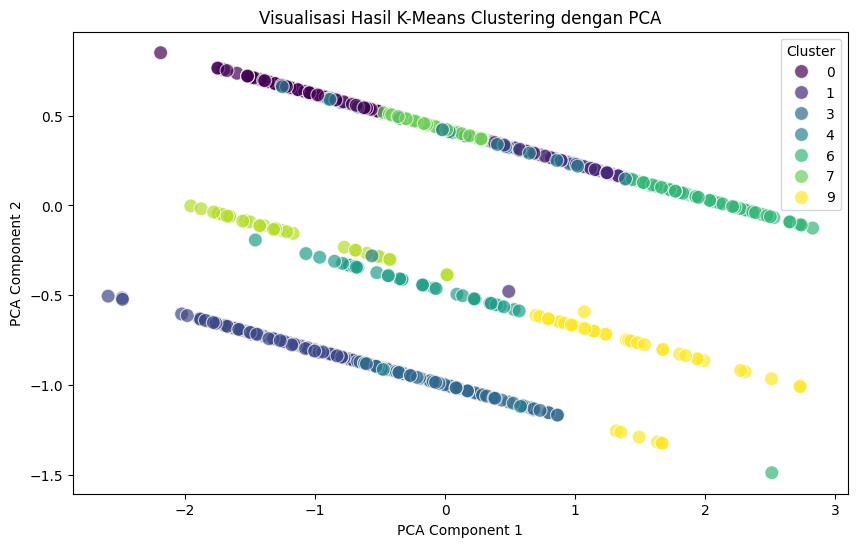

In [ ]:
# Visualisasi hasil clustering dengan PCA (2D)
pca = PCA(n_components=2)
pca_components = pca.fit_transform(preprocessor.transform(features))

# Menambahkan hasil PCA dan cluster ke dalam dataframe
de_salaries['PCA_1'] = pca_components[:, 0]
de_salaries['PCA_2'] = pca_components[:, 1]

# Visualisasi PCA dengan warna berdasarkan cluster
plt.figure(figsize=(10, 6))
sns.scatterplot(x='PCA_1', y='PCA_2', hue='Cluster', palette='viridis', data=de_salaries, s=100, alpha=0.7)
plt.title('Visualisasi Hasil K-Means Clustering dengan PCA')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.show()

In [ ]:
# Menampilkan jumlah data di setiap cluster.
print("Jumlah data di tiap cluster:")
print(de_salaries['Cluster'].value_counts())

Jumlah data di tiap cluster:
Cluster
7    228
1    183
0    164
2    127
3    108
6     95
9     45
5     37
4     34
8     33
Name: count, dtype: int64


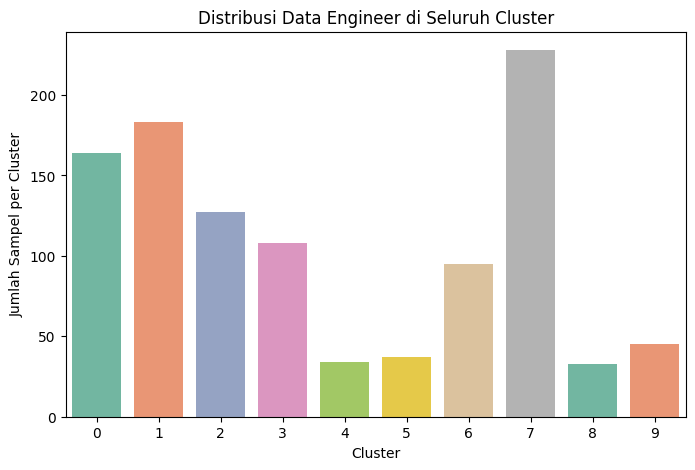

In [ ]:
# Visualisasi jumlah data di setiap cluster
plt.figure(figsize=(8, 5))
sns.countplot(x='Cluster', data=de_salaries, palette='Set2', hue='Cluster', legend=False)
plt.title('Distribusi Data Engineer di Seluruh Cluster')
plt.xlabel('Cluster')
plt.ylabel('Jumlah Sampel per Cluster')
plt.show()


In [ ]:
# Filter Cluster 7
cluster_7 = de_salaries[de_salaries['Cluster'] == 7]

# ================== 1. KARAKTERISTIK UTAMA ==================
print("==== KARAKTERISTIK UTAMA CLUSTER 7 ====")
print(f"Jumlah anggota Cluster 7: {len(cluster_7)}")
print(f"Rata-rata gaji: ${cluster_7['salary_in_usd'].mean():.2f}")


# ================== 2. DISTRIBUSI ANGGOTA ==================
print("\n==== DISTRIBUSI ANGGOTA ====")
print("Distribusi pengalaman kerja:")
print(cluster_7['experience_level'].value_counts(sort=False))

print("\nDistribusi Jenis Pekerjaan:")
print(cluster_7['employment_type'].value_counts())

print("\nDistribusi ukuran perusahaan:")
print(cluster_7['company_size'].value_counts())

# ================== 5. RANGKUMAN ==================
print("\n==== RANGKUMAN ====")
dominant_experience_level = cluster_7['experience_level'].mode()[0]
dominant_employment_type = cluster_7['employment_type'].mode()[0]
dominant_company_size = cluster_7['company_size'].mode()[0]

print(f"Cluster 7 memiliki anggota terbanyak dengan rata-rata gaji ${cluster_7['salary_in_usd'].mean():.2f}, "
      f"\ndi mana anggotanya terdiri dari pekerja {dominant_employment_type} {dominant_experience_level} "
      f"yang bekerja di perusahaan berukuran {dominant_company_size}.")



==== KARAKTERISTIK UTAMA CLUSTER 7 ====
Jumlah anggota Cluster 7: 228
Rata-rata gaji: $143791.32

==== DISTRIBUSI ANGGOTA ====
Distribusi pengalaman kerja:
experience_level
Senior-level    228
Name: count, dtype: int64

Distribusi Jenis Pekerjaan:
employment_type
Full-time    228
Name: count, dtype: int64

Distribusi ukuran perusahaan:
company_size
Medium    228
Name: count, dtype: int64

==== RANGKUMAN ====
Cluster 7 memiliki anggota terbanyak dengan rata-rata gaji $143791.32, 
di mana anggotanya terdiri dari pekerja Full-time Senior-level yang bekerja di perusahaan berukuran Medium.


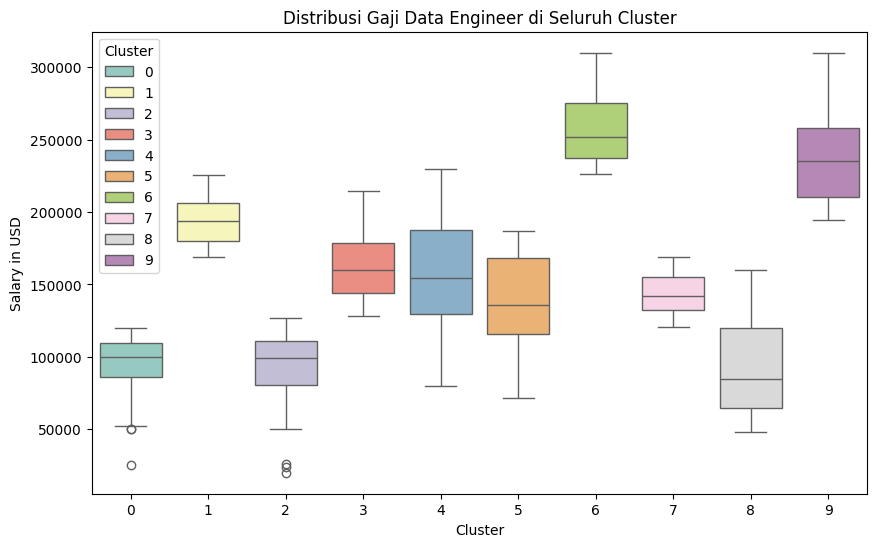

In [ ]:
# Visualisasi perbandingan gaji berdasarkan cluster
plt.figure(figsize=(10, 6))
sns.boxplot(x='Cluster', y='salary_in_usd', hue='Cluster', data=de_salaries, palette='Set3')
plt.title('Distribusi Gaji Data Engineer di Seluruh Cluster')
plt.xlabel('Cluster')
plt.ylabel('Salary in USD')
plt.show()

In [ ]:
# Filter Cluster 6
cluster_6 = de_salaries[de_salaries['Cluster'] == 6]

# ================== 1. KARAKTERISTIK UTAMA ==================
print("==== KARAKTERISTIK UTAMA CLUSTER 6 ====")
print(f"Jumlah anggota Cluster 6: {len(cluster_6)}")
print(f"Rata-rata gaji: ${cluster_6['salary_in_usd'].mean():.2f}")


# ================== 2. DISTRIBUSI ANGGOTA ==================
print("\n==== DISTRIBUSI ANGGOTA ====")
print("Distribusi pengalaman kerja:")
print(cluster_6['experience_level'].value_counts(sort=False))

print("\nDistribusi Jenis Pekerjaan:")
print(cluster_6['employment_type'].value_counts())

print("\nDistribusi ukuran perusahaan:")
print(cluster_6['company_size'].value_counts())

# ================== 5. RANGKUMAN ==================
print("\n==== RANGKUMAN ====")
dominant_experience_level = cluster_6['experience_level'].mode()[0]
dominant_employment_type = cluster_6['employment_type'].mode()[0]
dominant_company_size = cluster_6['company_size'].mode()[0]

print(f"Cluster 6 merupakan cluster dengan rata-rata gaji tertinggi, \nyaitu ${cluster_6['salary_in_usd'].mean():.2f} "
      f"dan didominasi oleh pekerja {dominant_employment_type} {dominant_experience_level} "
      f"yang bekerja di perusahaan berukuran {dominant_company_size}.")



==== KARAKTERISTIK UTAMA CLUSTER 6 ====
Jumlah anggota Cluster 6: 95
Rata-rata gaji: $257344.63

==== DISTRIBUSI ANGGOTA ====
Distribusi pengalaman kerja:
experience_level
Senior-level    94
Mid-level        1
Name: count, dtype: int64

Distribusi Jenis Pekerjaan:
employment_type
Full-time    95
Name: count, dtype: int64

Distribusi ukuran perusahaan:
company_size
Medium    94
Large      1
Name: count, dtype: int64

==== RANGKUMAN ====
Cluster 6 merupakan cluster dengan rata-rata gaji tertinggi, 
yaitu $257344.63 dan didominasi oleh pekerja Full-time Senior-level yang bekerja di perusahaan berukuran Medium.
